<a href="https://colab.research.google.com/github/jansle2005/Data-Science-Repository/blob/master/AM_Alguns_Muns_Conectividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [49]:
# Lê o arquivo xls usando o Pandas
df = pd.read_excel("bandalarga.xlsx")

,Ano,Mês,UF,Densidade
0,2007,3,AM,0.051731
1,2007,3,PA,0.109668
2,2007,6,AM,0.052832
3,2007,6,PA,0.113177
4,2007,9,AM,0.052901
...,...,...,...,...
315,2022,10,PA,5.079779
316,2022,11,AM,2.234831
317,2022,11,PA,4.975507
318,2022,12,AM,2.332498


In [58]:
# Seleciona apenas as linhas com as UFs PA e AM
df_UF = df

In [87]:
import matplotlib.pyplot as plt

# Cria uma coluna Trimestre com base no Mês
df_UF['Semestre'] = (df['Mês'] - 1) // 6 + 1

# Agrupa por Ano, Trimestre e UF e calcula a média da Densidade para cada grupo
grouped = df_UF.groupby(['Ano', 'Semestre', 'UF']).mean()

# Cria uma coluna Ano_Trimestre como a concatenação de Ano e Trimestre
# grouped['Ano_Semestre'] = grouped.index.map(lambda x: str(x[0]) + '-S' + str(x[1]))

# Agrupa por Ano_Trimestre e UF e calcula a média da Densidade para cada grupo
grouped = grouped.groupby(['Ano', 'UF']).mean()

# Reset the index to convert MultiIndex to simple Index
grouped = grouped.reset_index()

# Pivot the DataFrame to create columns for each UF and Densidade as values
pivoted = grouped.pivot(index='Ano', columns='UF', values='Densidade')


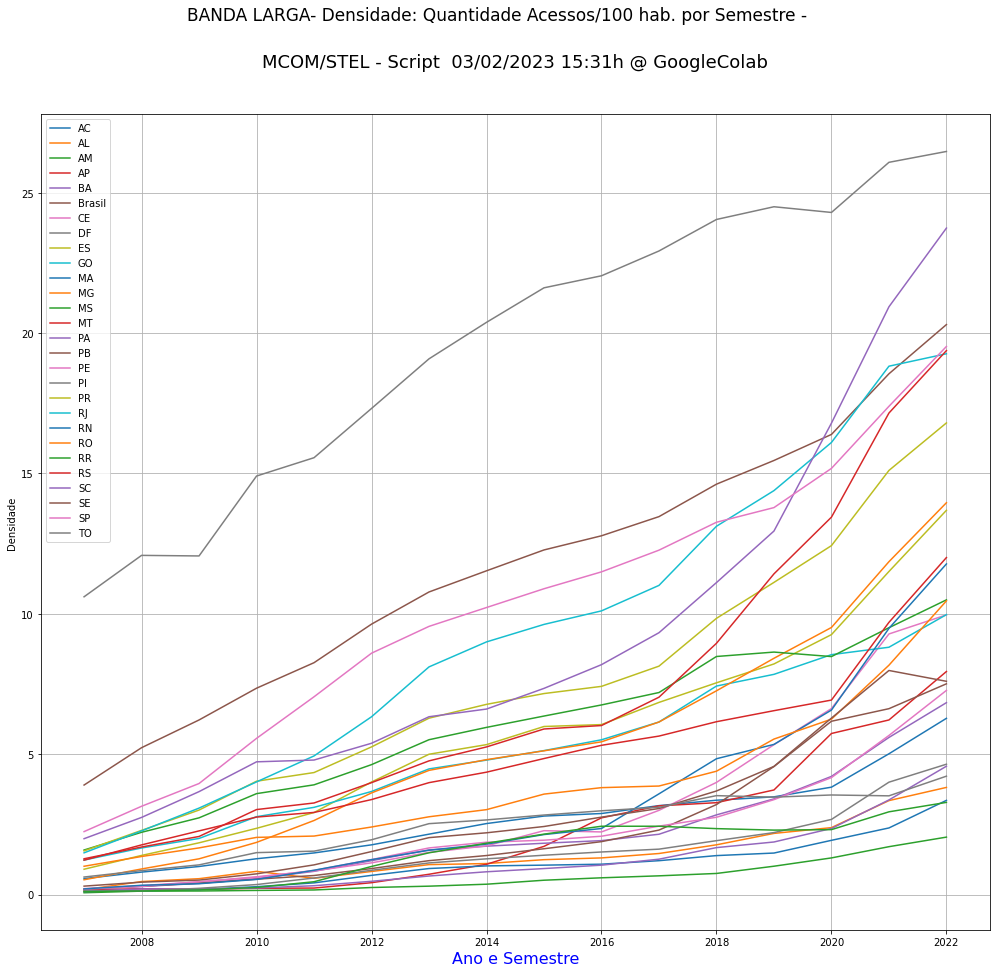

In [94]:
# Plota o gráfico de barras temporal
pivoted.plot(kind='line', figsize=(17, 15))
plt.xlabel("Ano e Semestre", fontsize=16, color='blue')
plt.ylabel("Densidade")
plt.legend(loc='best')
plt.suptitle("BANDA LARGA- Densidade: Quantidade Acessos/100 hab. por Semestre - ",fontsize=17)
plt.title("MCOM/STEL - Script  03/02/2023 15:31h @ GoogleColab", y=1.05, fontsize=18)
plt.grid()
plt.show()

In [69]:
pivoted.head()

UF,AC,AL,AM,AP,BA,Brasil,CE,DF,ES,GO,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
Ano_Semestre,,,,,,,,,,,,,,,,,,,,,
2007-S1,0.499561,0.137317,0.052353,0.176981,0.184178,3.508601,0.180769,10.013701,0.814589,1.088181,...,1.366178,1.307475,0.190019,0.899335,0.107139,1.172766,1.822972,0.264591,1.973054,0.566240
2007-S2,0.634003,0.201456,0.074932,0.163389,0.211757,4.291405,0.237035,11.198956,0.987400,1.368327,...,1.741826,1.662725,0.211131,1.114600,0.111133,1.375008,2.155194,0.332962,2.509809,0.680171
2008-S1,0.766304,0.412065,0.118698,0.193434,0.261933,4.974259,0.301246,12.089606,1.272560,1.582721,...,2.104522,2.103205,0.313226,1.270521,0.125402,1.609495,2.583091,0.418160,2.933723,0.815732
2008-S2,0.831207,0.512986,0.123415,0.215822,0.307717,5.486763,0.336672,12.073560,1.512654,1.734212,...,2.465039,2.431188,0.344469,1.438718,0.125274,1.774991,2.909672,0.462942,3.353792,0.888268
2009-S1,0.949221,0.533391,0.115961,0.170806,0.354054,6.006552,0.372568,12.187065,1.668601,1.903508,...,2.805549,2.843239,0.432908,1.552418,0.132270,1.934063,3.341290,0.431811,3.779433,0.998273


In [93]:
pivoted.to_excel(excel, sheet_name='ACESSO')
excel.save()

AttributeError: ignored

In [76]:
type(pivoted)

pandas.core.frame.DataFrame

In [81]:
# image resolution
dpi=96

# For each year:
for i in df_UF.Ano.unique():
 
    # Turn interactive plotting off
    plt.ioff()

    # initialize a figure
    fig = plt.figure(figsize=(680/dpi, 480/dpi), dpi=dpi)
    
    # Find the subset of the dataset for the current year
    subsetData = [ df_UF.Ano == i ]

    # Plota o gráfico de barras temporal
    subsetData.plot(kind='line', figsize=(17, 10))
    plt.xlabel("Ano e Semestre", fontsize=16, color='blue')
    plt.ylabel("Densidade")
    plt.suptitle("BANDA LARGA- Densidade: Quantidade Acessos/100 hab. por Semestre - ",fontsize=17)
    plt.title("MCOM/STEL - Script  03/02/2023 15:31h @ GoogleColab", y=1.05, fontsize=18)
    plt.show()


      
    # Save it & close the figure
    filename='/Users/yan.holtz/Desktop/Gapminder_step'+str(i)+'.png'
    plt.savefig(fname=filename, dpi=96)
    plt.gca()
    plt.close(fig)

AttributeError: ignored

<Figure size 680x480 with 0 Axes>

In [2]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Lê o arquivo xls usando o Pandas
df_mun = pd.read_excel("municipiobandalarga.xlsx")
df_mun.head()


,Ano,Mês,UF,Município,Código IBGE,Densidade,Nível Geográfico Densidade
0,2022,12,RO,Alta Floresta D'Oeste,1100015,8.958074,Municipio
1,2022,12,RO,Ariquemes,1100023,21.363407,Municipio
2,2022,12,RO,Cabixi,1100031,5.407539,Municipio
3,2022,12,RO,Cacoal,1100049,19.480189,Municipio
4,2022,12,RO,Cerejeiras,1100056,8.540527,Municipio


In [4]:
# Cria uma lista com as cidades que deseja filtrar
listaparafiltrar = ["Almeirim","Monte ALegre","Santarém","Alenquer","Óbidos","Curuá"]

# Filtra o dataframe pelo conteúdo da coluna "cidade"
df_filtrado = df_mun[df_mun["Município"].isin(listaparafiltrar)]

# Agrupa por Ano, Trimestre e UF e calcula a média da Densidade para cada grupo
# grouped = df_UF.groupby(['Ano', 'Semestre', 'UF']).mean()

# Cria uma coluna Ano_Trimestre como a concatenação de Ano e Trimestre
# grouped['Ano_Semestre'] = grouped.index.map(lambda x: str(x[0]) + '-S' + str(x[1]))


In [5]:

# Agrupa por Ano e município e calcula a média da Densidade para cada grupo
grouped = df_filtrado.groupby(['Ano', 'Município']).mean()

# Reset the index to convert MultiIndex to simple Index
grouped = grouped.reset_index()




In [6]:
# Pivot the DataFrame to create columns for each UF and Densidade as values
pivoted = grouped.pivot(index='Ano', columns='Município', values='Densidade')

# Para salvar uma planilha pivotada
#pivoted.to_excel('mun_pivoted.xlsx')

In [17]:
import datetime
now = datetime.datetime.now()
timeStamp=now.strftime("Data: %d-%m-%Y , %H:%M:%S UTC")
print(timeStamp)

Data: 06-02-2023 , 15:05:36 UTC


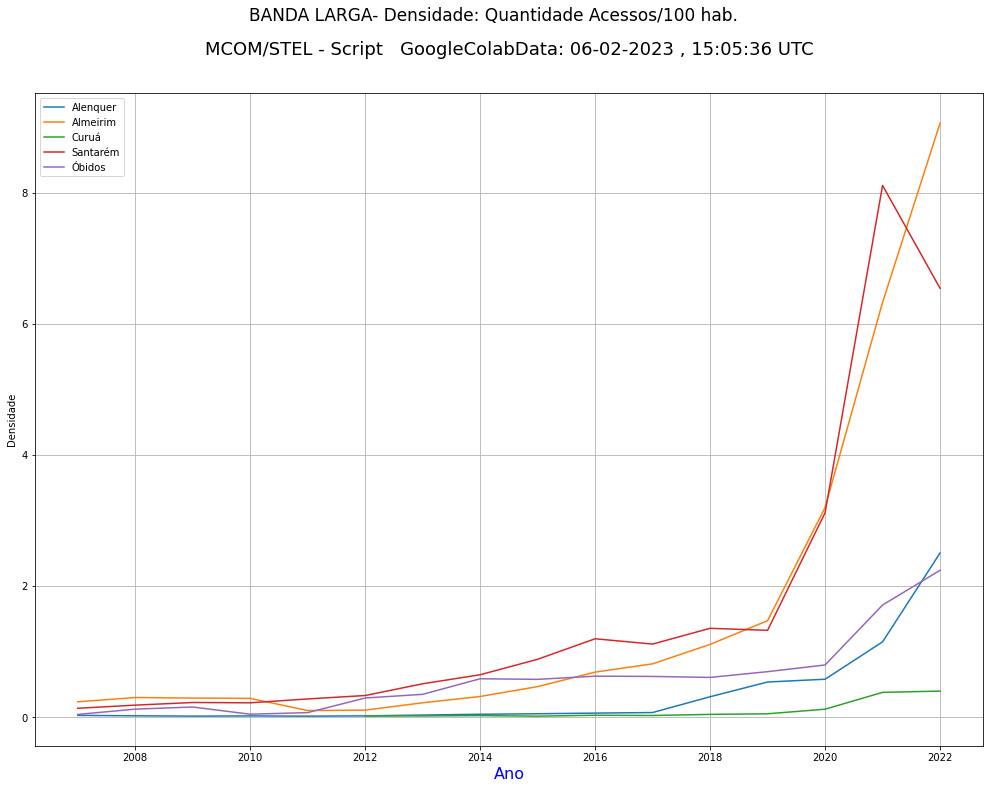

In [20]:

# Plota o gráfico de barras temporal
pivoted.plot(kind='line', figsize=(17, 12))
plt.xlabel("Ano", fontsize=16, color='blue')
plt.ylabel("Densidade")
plt.legend(loc='best')
plt.suptitle("BANDA LARGA- Densidade: Quantidade Acessos/100 hab.",fontsize=17)
plt.title("MCOM/STEL - Script   GoogleColab"+timeStamp, y=1.05, fontsize=18)
plt.grid()
plt.show()